# Notebook for main analysis

## 1. Import relevant libraries

In [6]:
# Run this if you don't have wordcloud already
!pip install wordcloud

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import numpy as np

## 2. Load the data

In [10]:
df = pd.read_csv("spotify_data_combined.csv")
df.tail()

,endTime,artistName,trackName,msPlayed,dayOfWeek
27192,2022-11-01 20:05:00,Madvillain,Fancy Clown,115742,Tuesday
27193,2022-11-01 20:07:00,Madvillain,Accordion,118670,Tuesday
27194,2022-11-01 20:09:00,Madvillain,Raid,149968,Tuesday
27195,2022-11-01 20:11:00,JJ DOOM,Waterlogged,109830,Tuesday
27196,2022-11-01 20:30:00,JJ DOOM,Guv'nor,49156,Tuesday


## 3.1. Music trends

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27197 entries, 0 to 27196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     27197 non-null  object
 1   artistName  27197 non-null  object
 2   trackName   27197 non-null  object
 3   msPlayed    27197 non-null  int64 
 4   dayOfWeek   27197 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [16]:
# Convert the date into a datetime format
df["endTime"] = pd.to_datetime(df["endTime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27197 entries, 0 to 27196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     27197 non-null  datetime64[ns]
 1   artistName  27197 non-null  object        
 2   trackName   27197 non-null  object        
 3   msPlayed    27197 non-null  int64         
 4   dayOfWeek   27197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [17]:
# Separate date into its components
def separate_dates(date_input):
    years = []
    months = []
    days = []
    hours = []
    minutes = []
    for i in range(len(date_input)):
        date_entry = date_input[i]
        years.append(date_entry.year)
        months.append(date_entry.month)
        days.append(date_entry.day)
        hours.append(date_entry.hour)
        minutes.append(date_entry.minute)

    return years, months, days, hours, minutes

In [20]:
data_years, data_months, data_days, data_hours, data_minutes = separate_dates(df["endTime"])
data_years[-1]

2022

In [22]:
data_sorted_hours = sorted(data_hours)
data_sorted_hours[-1]

23

In [23]:
def count_hours(sorted_hours):
    hours_count = [sorted_hours.count(i) for i in range(24)]
    return hours_count

In [24]:
data_count_hours = count_hours(data_sorted_hours)
data_count_hours

[731,
 720,
 569,
 419,
 575,
 777,
 1128,
 1646,
 1579,
 1751,
 1903,
 1974,
 1805,
 1775,
 1642,
 1663,
 1154,
 793,
 719,
 871,
 763,
 824,
 663,
 753]

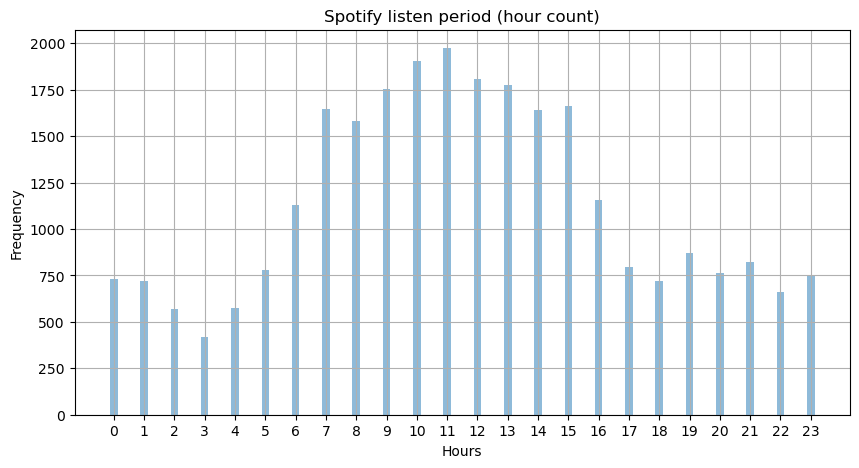

In [67]:
x = np.arange(len(data_count_hours))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(x, data_count_hours, width, align='center', alpha = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xlabel('Hours')
ax.set_title('Spotify listen period (hour count)')
ax.set_xticks(x, list(x))
plt.grid()
# plt.savefig("1_hourly_trends.png", dpi = 1000, bbox_inches=0, pad_inches=0)
plt.show()
# sns.barplot(x=x, y=data_count_hours, color="blue", saturation=0.5, palette="Blues")

In [55]:
day_counts = df['dayOfWeek'].value_counts(sort=False)
day_counts

Monday       4355
Tuesday      3985
Wednesday    3647
Thursday     4049
Friday       3965
Saturday     3935
Sunday       3261
Name: dayOfWeek, dtype: int64

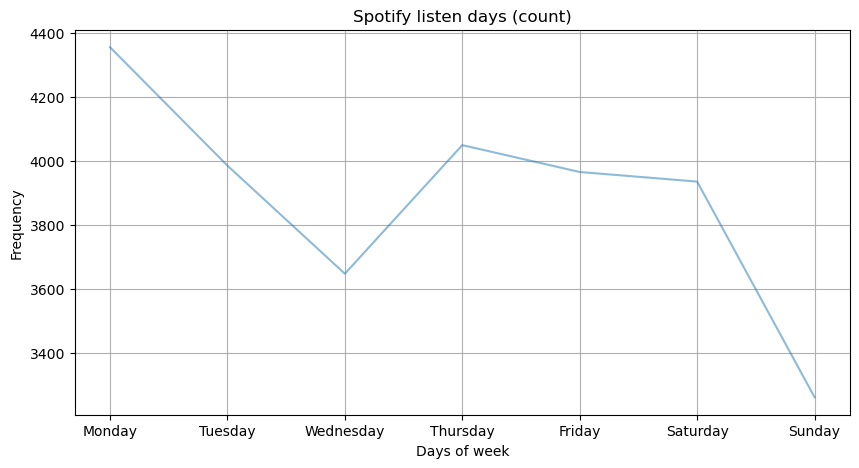

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(day_counts, alpha = 0.5)
ax.set_ylabel('Frequency')
ax.set_xlabel('Days of week')
ax.set_title('Spotify listen days (count)')
plt.grid()
plt.savefig("2_daily_trends.png", dpi = 1000, bbox_inches=0, pad_inches=0)
plt.show()

In [57]:
def count_months(month_data):
    month_count = [month_data.count(i) for i in range(1,13)]
    return month_count

In [60]:
month_count = count_months(data_months)
month_count

[1969, 2364, 1881, 2331, 2086, 2305, 1661, 2283, 3224, 1807, 2314, 2972]

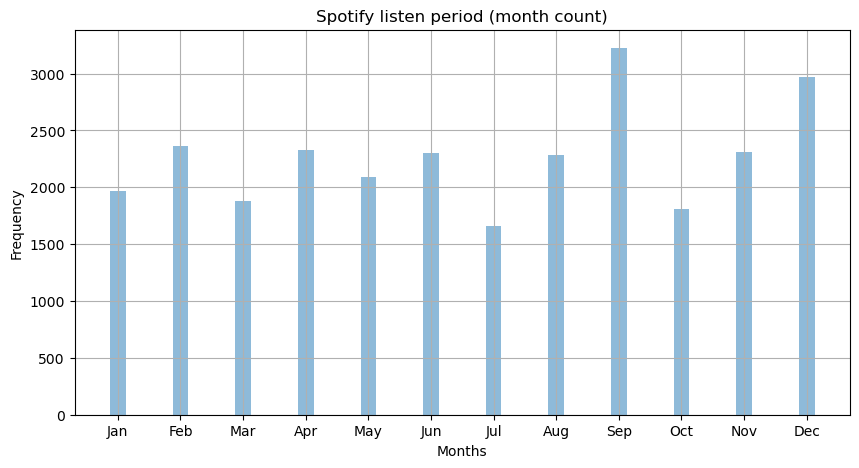

In [69]:
x = np.arange(len(month_count))
width = 0.25
months_ticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(x, month_count, width, align='center', alpha = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xlabel('Months')
ax.set_title('Spotify listen period (month count)')
ax.set_xticks(x, months_ticks)
plt.grid()
# plt.savefig("3_monthly_trends.png", dpi = 1000, bbox_inches=0, pad_inches=0)
plt.show()

## 3.2. Artist analysis

In [12]:
# Mpho's code will go here

## 3.3. Song analysis

In [13]:
# Code goes here

## 3.4. Song length analysis

In [14]:
# Code goes here